In [29]:
import pandas as pd
import numpy as np
from nlpdb import DB
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import requests
import seaborn as sns
from wordcloud import WordCloud

from nlpdb import DB
import nltk
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from re import sub
import string
from collections import Counter
import json

morph = MorphAnalyzer()

In [96]:
dcdf = pd.read_pickle('dcdf.pickle')

In [118]:
def lemmetize(df, rubric_id):

    stop_words = stopwords.words('russian')
    stop_words.extend(['что', 'че', 'чё' 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'если', '""', "''", '``'])

    textlist = df[df.rubric_id==rubric_id].text.tolist()
    corpus = ' '.join(textlist)
    corpus = corpus.lower()
    corpus = sub('\[id[0-9]*?\|.*?\]', '', corpus)
    tokens = nltk.word_tokenize(corpus)
    tokens = [i for i in tokens if ( i not in string.punctuation )] #Eliminate punctuation
    tokens = [i for i in tokens if ( i not in stop_words )] #Eliminate stop_words
    tokens = [sub('\W', '', i) for i in tokens] #Eliminate non-words
    tokens = [i for i in tokens if i] #Eliminate '' and ""
    tokens_pos = nltk.pos_tag(tokens, lang='rus') # Detect POS of tokens and return tuple (token, POS)
    tokens = [i[0] for i in tokens_pos if (i[1] in ['S'])] #Return only nouns and verbs ???
    normal_tokens = [morph.normal_forms(i)[0] for i in tokens] #Lemmetize (returns normal form)
    normal_tokens = [morph.normal_forms(i)[0] for i in tokens] #Lemmetize (returns normal form
    
    return normal_tokens
    '''
    result = []
    for row in comments:
        #polarity = row[2]
        comment_id = row[0]
        comment = row[5].lower()
        comment = sub('\[id[0-9]*?\|.*?\]', '', comment)

        tokens = nltk.word_tokenize(comment)
        tokens = [i for i in tokens if ( i not in string.punctuation )] #Eliminate punctuation
        tokens = [i for i in tokens if ( i not in stop_words )] #Eliminate stop_words
        tokens = [sub('\W', '', i) for i in tokens] #Eliminate non-words
        tokens = [i for i in tokens if i] #Eliminate '' and ""

        tokens_pos = nltk.pos_tag(tokens, lang='rus') # Detect POS of tokens and return tuple (token, POS)
        tokens = [i[0] for i in tokens_pos if (i[1] in ['V', 'S'] or 'A=' in i[1] or 'NUM' in i[1])] #Return only nouns and verbs ???
        #root_idxs = [tokens.index(i) for i in tokens if root_word in i]
        #tokens = [tokens[i-n:i+n] for i in root_idxs]

        # Flatten token lists of list

        #tokens = [i for i in sublist for sublist in tokens]
        #normal_tokens = [morph.parse(i)[0].inflect({'sing', 'nomn'}).word for i in tokens]
        '''

'''
if __name__ == '__main__':
    for category in ['sssr', 'lenin', 'revolution']:
        for year in [2015, 2016, 2017]:
            result, total_comments = main(year)
            unique_words = len(result)
            c = Counter(result)
            common = c.most_common(30)
            with open('_result_frequencies_115k_[{}_{}_vna-num].json'.format(year, category), 'w') as f:
                json.dump({'total_comments': total_comments, 'unique_words': unique_words, 'result': common}, f)
                '''

"\nif __name__ == '__main__':\n    for category in ['sssr', 'lenin', 'revolution']:\n        for year in [2015, 2016, 2017]:\n            result, total_comments = main(year)\n            unique_words = len(result)\n            c = Counter(result)\n            common = c.most_common(30)\n            with open('_result_frequencies_115k_[{}_{}_vna-num].json'.format(year, category), 'w') as f:\n                json.dump({'total_comments': total_comments, 'unique_words': unique_words, 'result': common}, f)\n                "

In [119]:
todo = [1,3,8,10,22,24,30,31,36,44,46,48,53,63,64,67,69]

for rubric_id in [69]:
    result = lemmetize(dcdf, rubric_id)
    eliminate = set(['год', 'человек'])
    result = [x for x in result if x not in eliminate]
    c = Counter(result)
    common = c.most_common(50)
    s = pd.DataFrame(common, columns=['word', 'quantity'])
    s.index = s.word
    s = s.drop('word', axis=1)
    s.to_excel('word_tokens_{}.xls'.format(rubric_id))

In [223]:
eliminate = set(['год', 'человек', 'мочь', 'говорить', 'советский', 'союз', 'время', 'жить', 'быть', 'хотеть', 'ребёнок', 'жизнь', 'дело', 'день', 'сторона', 'место', 'слово', 'часть', 'вопрос', 'тысяча', 'проблема', 'пора', 'конец', 'факт', 'уровень', 'число'])
result = [x for x in result if x not in eliminate]

In [252]:
c = Counter(result)
common = c.most_common(50)
s = pd.DataFrame(common, columns=['word', 'quantity'])
s.index = s.word
s = s.drop('word', axis=1)
s
#s.to_excel('word_tokens_{}.xls'.format(rubri_id))

,quantity
word,
ссср,1855
россия,724
страна,664
война,399
мир,301
народ,268
власть,237
фильм,236
история,231


In [191]:
i = 1
for x in c.most_common():
    i += 1
    if 'ленин' in x[0]:
        break
i

126

In [253]:
fc = [[x[0].capitalize()]*x[1] for x in common]
fcc = [item for sublist in fc for item in sublist]
#fcc = fc
q = [x if x not in ['Ссср', 'Рф', 'Сша'] else x.upper() for x in fcc]


In [254]:
fccc = ['Деньги' if x in ['Деньга'] else x for x in q]

In [255]:
shuffle(fccc)
' '.join(fccc)

'Гитлер Закон Политика Война Страна Россия Фильм Страна Миллион Страна СССР История Страна Россия СССР Страна Немец СССР Германия Флаг СССР Закон Народ Россия Польша Власть Война СССР Россия СССР Система Территория Миллион Страна Путин Война Власть Система СССР Народ СССР Власть Фильм Экономика Россия СССР Народ Право Сталин СССР СССР Мир Польша Путин СССР Завод История Памятник Война Система Россия Страна США Страна Польша СССР СССР Россия Страна Страна Страна США Страна СССР Армия Территория Война Территория Германия Земля СССР Германия Война Страна Право Власть Америка История Страна Страна Германия Государство Система Флаг СССР СССР Рубль Россия Мир СССР Россия Мир Война Путин СССР Россия Страна Победа Война СССР Мир Гитлер СССР Россия США Герой Власть История Республика СССР Правительство Флаг Век Земля Война Война Деньги СССР СССР Экономика СССР СССР Памятник СССР Россия СССР СССР Территория Город СССР Путин СССР Войско Победа Гражданин Работа Россия Памятник Война Флаг СССР Госу

In [208]:
from random import shuffle
#shuffle(flat_common)
fc = [[x[0].capitalize()]*x[1] for x in common]
#fcc = fc
fcc = [item for sublist in fcc for item in sublist]
fccc = [x if x not in ['Ссср', 'Рф', 'Сша'] else x.upper() for x in fcc]
fccc = ['Деньги' if x in ['Деньга'] else x for x in fccc]


'л с Р ь ь л С н к к ь и т т Э р о а а м т с с н с В е а а н С З с с С с я и е г р е т я и с а с а р б н р М и г м с с и н П и а о а П т н с и а а с З н о о Ф т р а ц д н л а р я к о и н Ф т т С т я с р О ь е и к о т а П я т а н о а н С н а р С б г с Р н в с м р д р а о р и р о р е м и р с а С Э ц н я С А М н Т С н и а с ь я р а т с и н с ц В а д П а н е е Г Ф т с р р т Г м н н с т т П р п с т о д о с В а У е р ь а ь р С н ь с о е Р с д с с и с и о р н а Н а р л а а з о И о т р о Г с н р т а а с р а а с о е с а Ф л а к о а о т з р С р ц л о П ь б р р н и в н а с Э с н я р е а У н Р и С р е Ф в о и и а л т а а О а с е а С ь С я с а п С р П т р е и р а и П с С с о р к р р а к Р с с ц п о м с й о д ж а н р с Ф Р З я ш и в я т с С р а б с н С С а к н о и С в о ь Р в т а о р е й м у р е Р р д о о и р З к о п н р о й н т о й П с с а а р о т с г ш й л р ь н с н г и р в и е и В и й б н е С И л й Г с и и в т В с л т р р р б с П М В т л Ф р а с т а н С е ь а т с и я л с и р я Г а Н т о П р и р Н

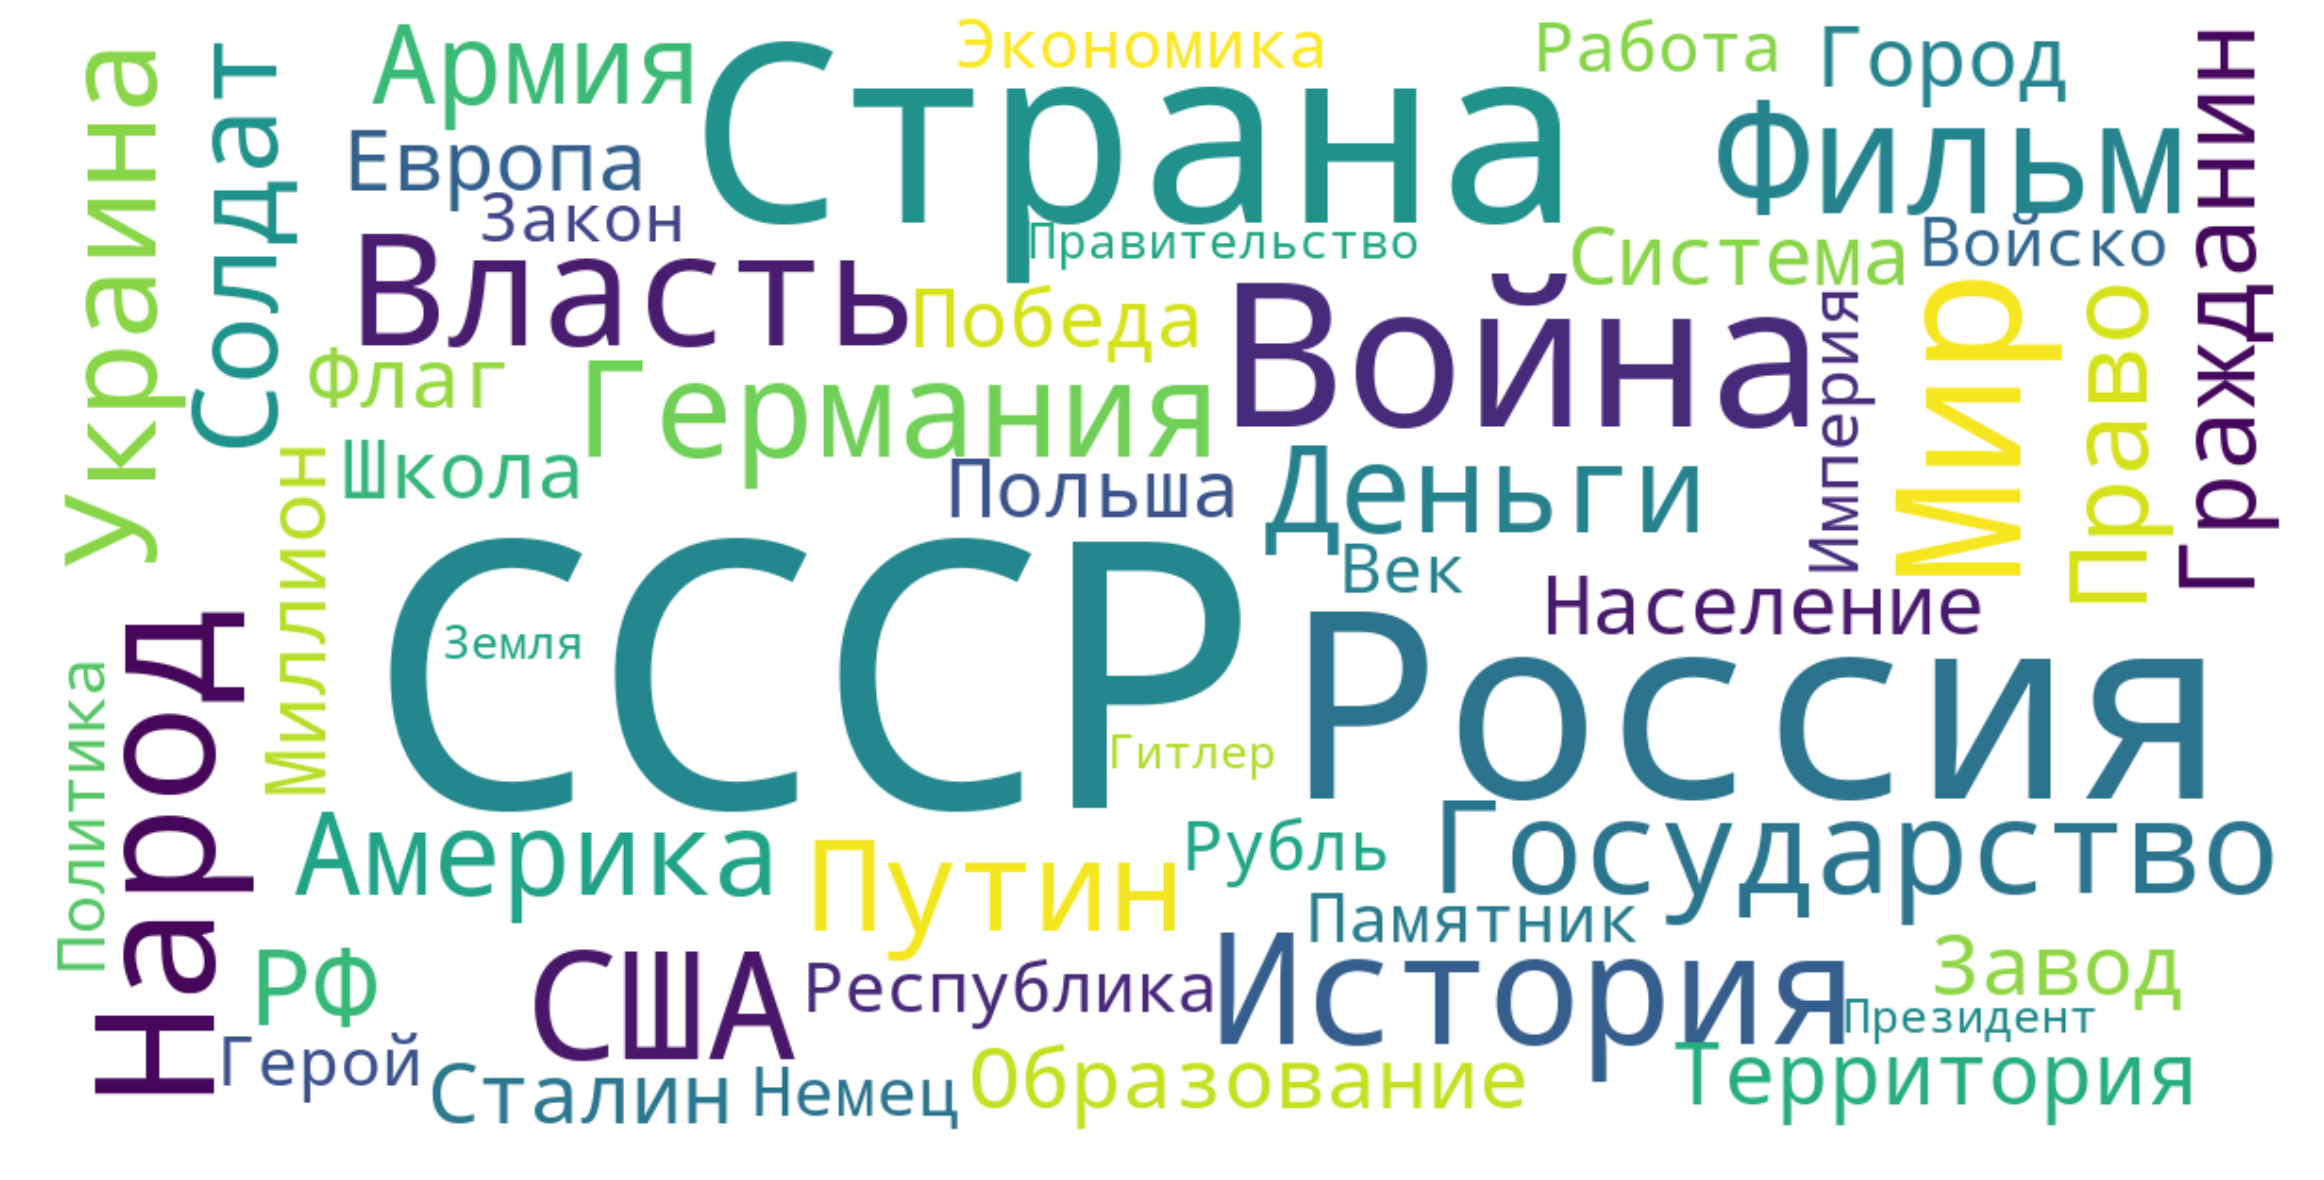

In [256]:
#sns.set_palette(sns.color_palette("RdBu", 20))
wc = WordCloud(width=1200, height=600, margin=0, background_color="white", colormap=None).generate(' '.join(fccc))
fig = plt.figure(figsize=(30,15), dpi=100)
plt.imshow(wc, interpolation="bilinear", aspect="equal")
plt.axis('off')
plt.margins(x=0, y=0)
#plt.show()
plt.savefig('wordcloud_{}.png'.format('ussr'), figsize=(30,15), bbox_inches='tight', dpi=100)